In [6]:
# TensorFlow and tf.keras
# SE OVER HVA VI EGENTLIG TRENGER
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical   
#from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers, optimizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Add channel dimension and normalize pixel values
train_images = train_images[:,:,:,np.newaxis]/255.0
test_images = test_images[:,:,:,np.newaxis]/255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)



### Med egen funksjon for å lage CNN:

In [16]:
# Create a function to make the CNN
def create_CNN(eta, lmbd):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Changed 63 to 64
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    #sgd = optimizers.legacy.SGD(learning_rate=eta)
    adam = optimizers.legacy.Adam(learning_rate=eta)# Trenger denne noe mer input?
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    
    return model

In [ ]:
epochs = 10
batch_size = 64

# Output: [1*10-5, 1*10-2, 10] burde bruke andre verdier
eta_vals = np.logspace(-5,1,3)
lmbd_vals = np.logspace(-5,1,3)

### CNN med ulike eta- og lambda-verdier

In [24]:
# INITIALIZE EMPTY MATRIX TO STORE?
CNN_keras = np.zeros((len(eta_vals),len(lmbd_vals)), dtype=object)
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = create_CNN(eta, lmbd)
        history = CNN.fit(train_images, train_labels, validation_split = 0.2, 
                          batch_size=64, epochs=10, 
                          validation_data=(test_images, test_labels))
        scores =  CNN.evaluate(test_images, test_labels, verbose=2)
        #test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
        CNN_keras[i][j] = CNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 1.7457 - accuracy: 0.5267 - val_loss: 1.1352 - val_accuracy: 0.6631
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.9053 - accuracy: 0.7149 - val_loss: 0.7951 - val_accuracy: 0.7287
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.7306 - accuracy: 0.7433 - val_loss: 0.7110 - val_accuracy: 0.7477
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.6684 - accuracy: 0.7571 - val_loss: 0.6661 - val_accuracy: 0.7576
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.6295 - accuracy: 0.7694 - val_loss: 0.6329 - val_accuracy: 0.7693
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.6012 - accuracy: 0.7787 - val_loss: 0.6078 - val_accuracy: 0.7805
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.5781 - accuracy: 0.7879 - val_loss: 0.5909 - val_accuracy: 0.7840
Epoc

Ser at på et punkt så blir alle accuracies 0.1. Bruk andre verdier for eta og lambda, 10 er alt for stort. 

313/313 [==============================] - 1s 2ms/step - loss: 3.5029 - accuracy: 0.1000


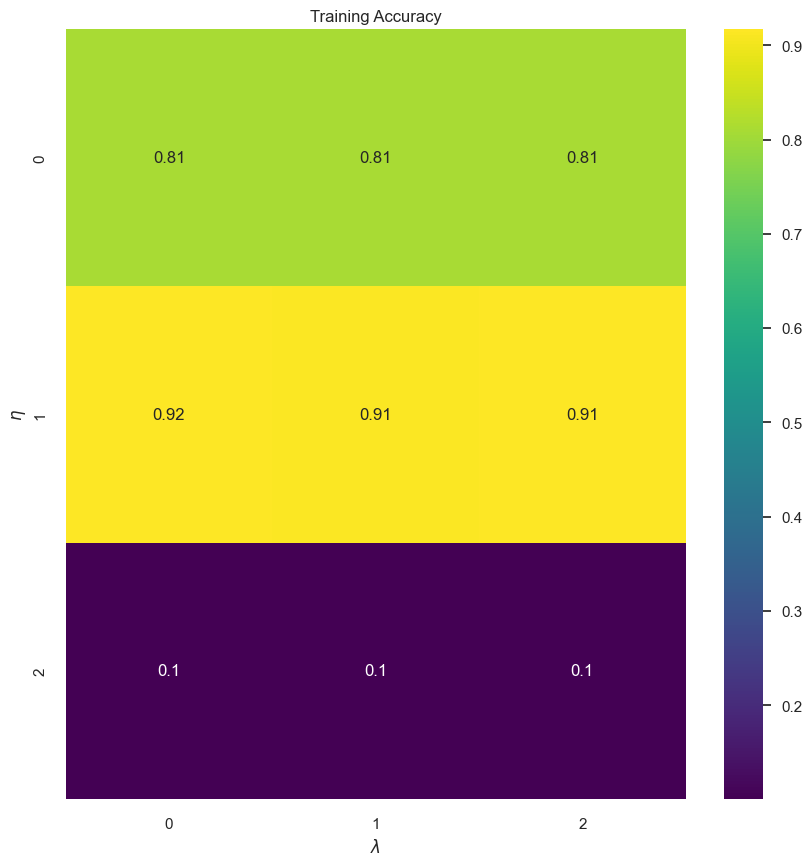

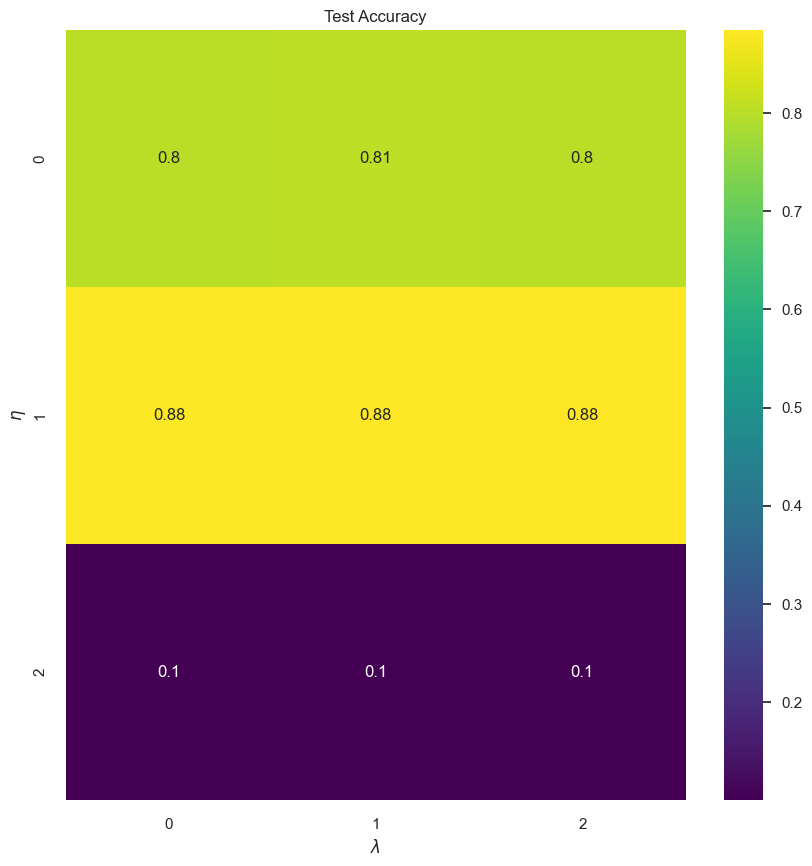

In [25]:
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set_theme(style='darkgrid')

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        CNN = CNN_keras[i][j]

        train_accuracy[i][j] = CNN.evaluate(train_images, train_labels)[1]
        test_accuracy[i][j] = CNN.evaluate(test_images, test_labels)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

### After grid search, use optimal lambda and eta values:

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4330 - accuracy: 0.8401 - val_loss: 0.3987 - val_accuracy: 0.8456
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3245 - accuracy: 0.8781 - val_loss: 0.3719 - val_accuracy: 0.8747
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3050 - accuracy: 0.8857 - val_loss: 0.3583 - val_accuracy: 0.8798
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2848 - accuracy: 0.8932 - val_loss: 0.3366 - val_accuracy: 0.8840
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2721 - accuracy: 0.8970 - val_loss: 0.3441 - val_accuracy: 0.8843
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2641 - accuracy: 0.9011 - val_loss: 0.3343 - val_accuracy: 0.8865
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2533 - accuracy: 0.9047 - val_loss: 0.3783 - val_accuracy: 0.8692
Epoch 

Text(0.5, 1.0, 'Confusion Matrix (eta=0.01, lambda=0.01)')

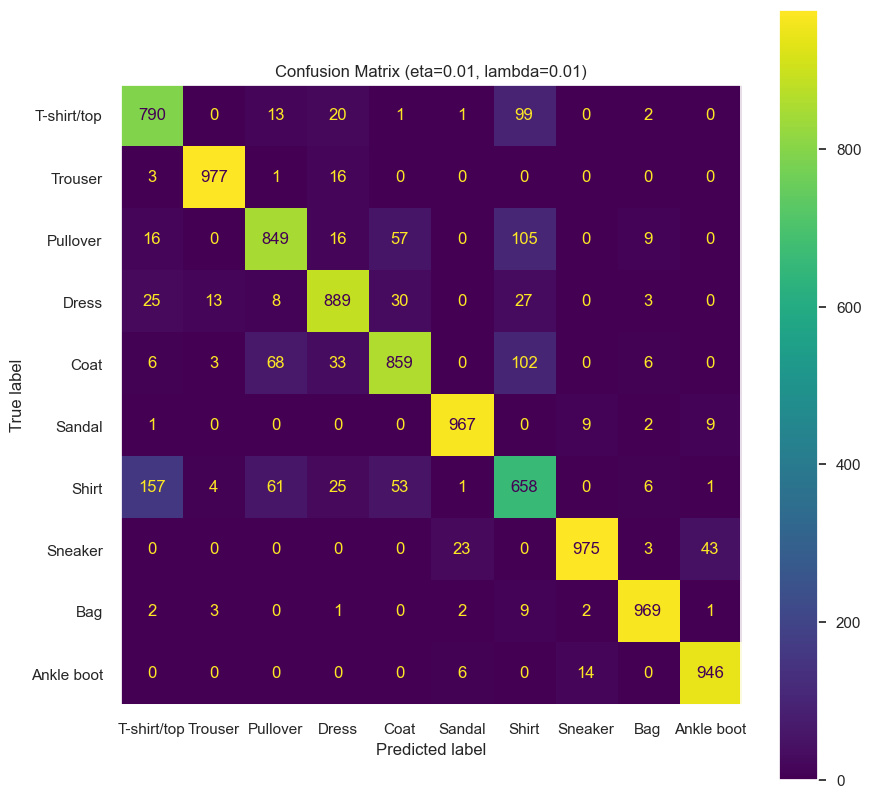

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Only looking at plot for best values for now:

best_eta = 0.01
best_lambda = 0.01

# Create and train model with optimal values
best_model = create_CNN(best_eta, best_lambda)
history_best = best_model.fit(train_images, train_labels, validation_split = 0.2, batch_size=64,  
                    epochs=10, validation_data=(test_images, test_labels))

# Predict on test set
test_probabilities = best_model.predict(test_images)

# Convert prediction probability into integers NEED THIS?
test_predictions = test_probabilities.argmax(axis=1)

# CONVERT TEST_LABELS FROM ONE HOT ENCODING TO CLASS INDICES
test_labels_indices = test_labels.argmax(axis=1) # convert 2d labels to 1d
# Confusion matrix
cm = confusion_matrix(test_predictions, test_labels_indices)

# Adding names to classes, we only have numbers (THIS SHOULD BE DONE IN THE VERY BEGINNING)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
ax.grid(False)
plt.title(f'Confusion Matrix (eta={best_eta}, lambda={best_lambda})')


Model is confusing mostly t-shirt, pullover, coat, shirt == similar categories. 

### Plot accuracy for optimal beta and lambda values

/var/folders/yw/7xk1wysd3kvfs513n3xmpn340000gn/T/ipykernel_31308/3838174932.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


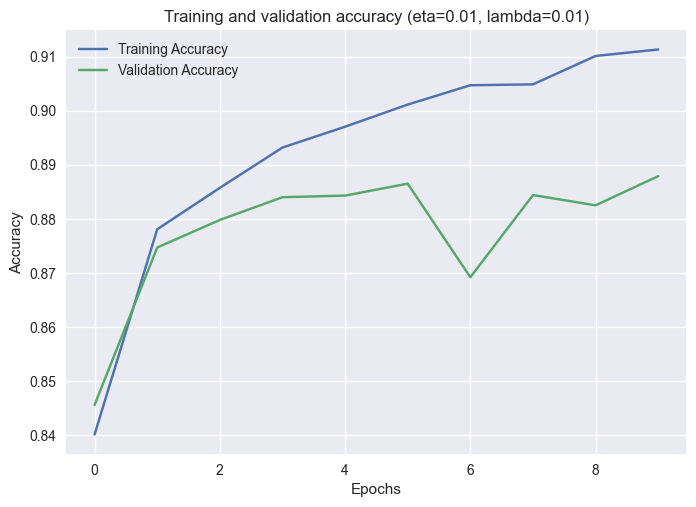

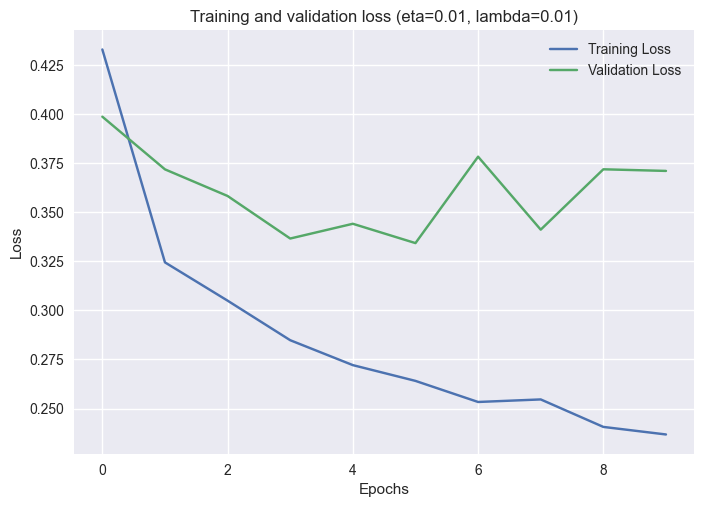

In [43]:
sns.set_theme(style="darkgrid")
plt.style.use('seaborn')


# Plot training and validation accuracy
plt.plot(history_best.history['accuracy'], label='Training Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Training and validation accuracy (eta={best_eta}, lambda={best_lambda})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title(f'Training and validation loss (eta={best_eta}, lambda={best_lambda})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## ----------------

### Rett frem implementasjon

In [ ]:

# Define the CNN mode
# Add regularizers to dense layers? use lmbd
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Changed 63 to 64
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with a reasonable learning rate
eta = 0.001  
adam = optimizers.legacy.Adam(learning_rate=eta)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# IMPLEMENT EARLY STOPPING?
'''
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_images, train_labels,
    validation_split=0.2,  # Use 20% of training data for validation
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=2
)
'''


"\nfrom tensorflow.keras.callbacks import EarlyStopping\n\nearly_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)\n\n# Train the model\nhistory = model.fit(\n    train_images, train_labels,\n    validation_split=0.2,  # Use 20% of training data for validation\n    batch_size=batch_size,\n    epochs=epochs,\n    callbacks=[early_stopping],\n    verbose=2\n)\n"

In [9]:
# Train the model
# Validation split: use 20% of training data as validation set
history = model.fit(train_images, train_labels, validation_split = 0.2, batch_size=64,  
                    epochs=10, validation_data=(test_images, test_labels))

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4846 - accuracy: 0.8238 - val_loss: 0.3844 - val_accuracy: 0.8557
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3226 - accuracy: 0.8830 - val_loss: 0.3124 - val_accuracy: 0.8861
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2783 - accuracy: 0.8982 - val_loss: 0.2886 - val_accuracy: 0.8936
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2465 - accuracy: 0.9088 - val_loss: 0.2698 - val_accuracy: 0.9009
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2202 - accuracy: 0.9192 - val_loss: 0.2585 - val_accuracy: 0.9043
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1998 - accuracy: 0.9251 - val_loss: 0.2769 - val_accuracy: 0.9017
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1783 - accuracy: 0.9338 - val_loss: 0.2473 - val_accuracy: 0.9111
Epoch 

/var/folders/yw/7xk1wysd3kvfs513n3xmpn340000gn/T/ipykernel_31308/1701416991.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


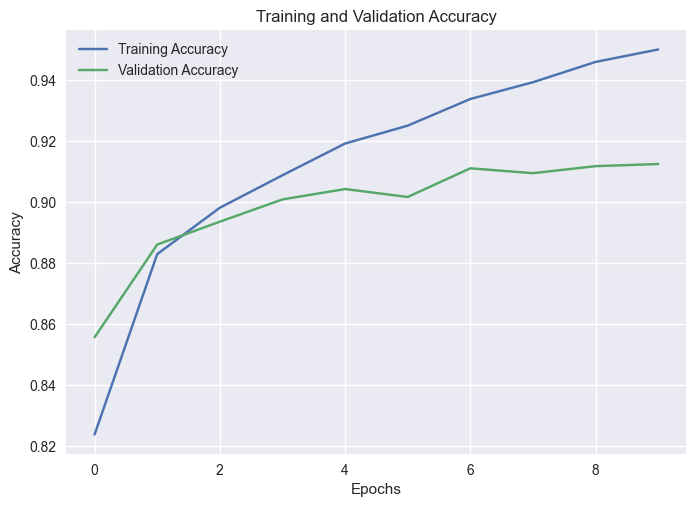

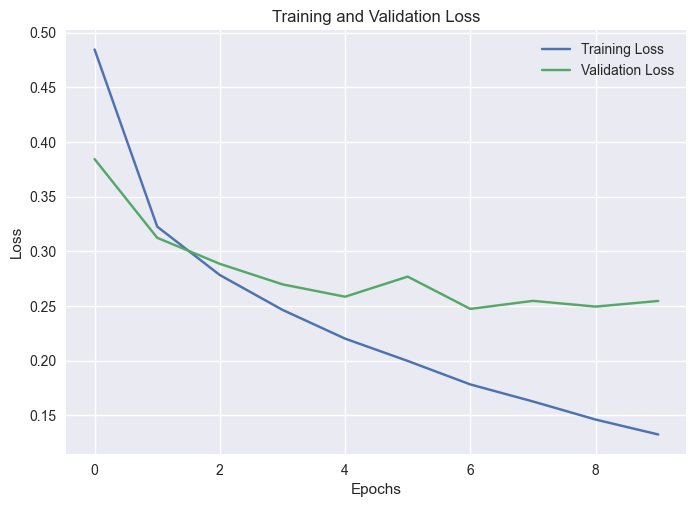

In [11]:
# Set Seaborn style
sns.set_theme(style="darkgrid")
plt.style.use('seaborn')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()